In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'C:\Users\user\Downloads\train_loan.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.duplicated().sum()

0

In [5]:
data.isna().sum() 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# exploratory data

In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
data = data.drop(['Loan_ID','Gender','Married','Self_Employed'],axis=1)

In [10]:
data = data.drop(['Dependents'],axis=1)

In [11]:
data.head()

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Graduate,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Graduate,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Graduate,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Not Graduate,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Graduate,6000,0.0,141.0,360.0,1.0,Urban,Y


# encoding boject column

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Education'] = le.fit_transform(data['Education'])
data['Property_Area'] = le.fit_transform(data['Property_Area'])
data['Loan_Status'] = le.fit_transform(data['Loan_Status'])

In [15]:
data.head()

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,5849,0.0,NaN,360.0,1.0,2,1
1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,0,3000,0.0,66.0,360.0,1.0,2,1
3,1,2583,2358.0,120.0,360.0,1.0,2,1
4,0,6000,0.0,141.0,360.0,1.0,2,1


# handiling missing values

In [17]:
data.isna().sum()

Education             0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

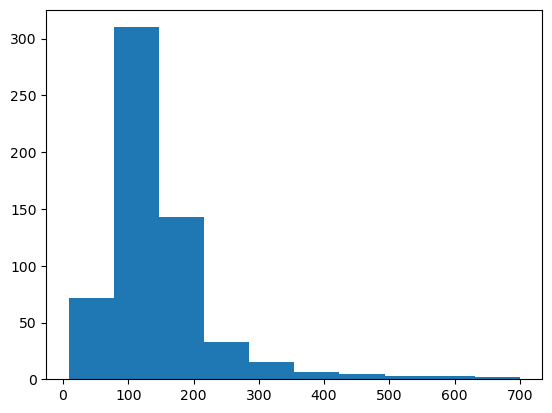

In [18]:
plt.hist(data['LoanAmount'])
plt.show()

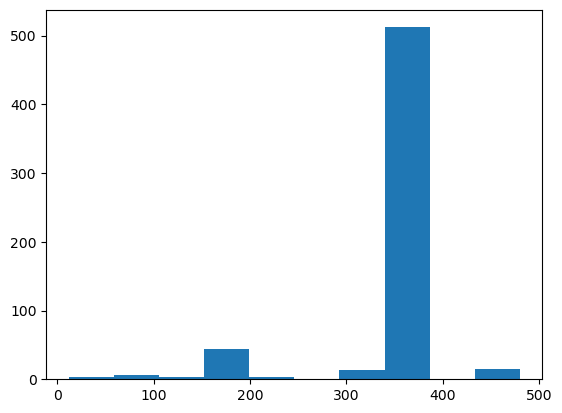

In [19]:
plt.hist(data['Loan_Amount_Term'])
plt.show()

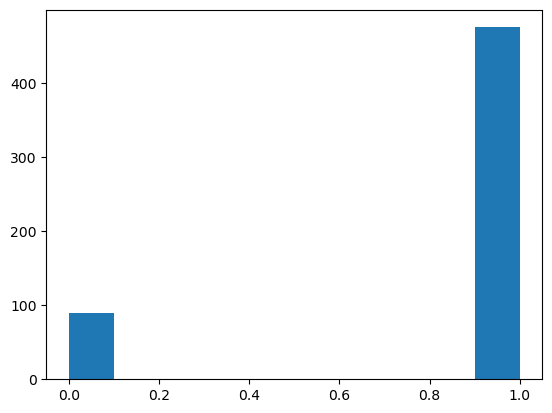

In [20]:
plt.hist(data['Credit_History'])
plt.show()

In [ ]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

In [23]:
data.isna().sum()

Education            0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# OUTLIERS HANDLING

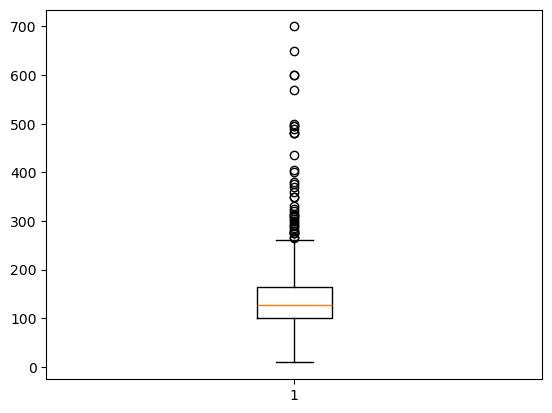

In [25]:
plt.boxplot(data['LoanAmount'])
plt.show()

# traning data

In [28]:
x = data.drop('Loan_Status',axis=1)
y = data['Loan_Status']

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# logistic regression

In [30]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [31]:
lr_model.fit(x_train,y_train)
y_pred_lr = lr_model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print('accuracy = ',accuracy_score(y_test,y_pred_lr))
print('confusion_matrix = \n',confusion_matrix(y_test,y_pred_lr))

accuracy =  0.7886178861788617
confusion_matrix = 
 [[18 25]
 [ 1 79]]


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
metric_k = []
neighbors = np.arange(3,15)
for n in neighbors:
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

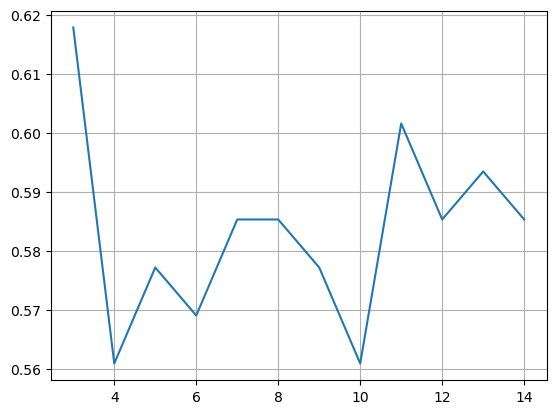

In [34]:
plt.plot(neighbors,metric_k)
plt.grid()

In [35]:
metric_k

[0.6178861788617886,
 0.5609756097560976,
 0.5772357723577236,
 0.5691056910569106,
 0.5853658536585366,
 0.5853658536585366,
 0.5772357723577236,
 0.5609756097560976,
 0.6016260162601627,
 0.5853658536585366,
 0.5934959349593496,
 0.5853658536585366]

In [36]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)
y_pred_knn = knn_model.predict(x_test)
print('Accuracy = ',accuracy_score(y_test,y_pred_knn))
print('confusion_matrix = \n',confusion_matrix(y_test,y_pred_knn))

Accuracy =  0.6178861788617886
confusion_matrix = 
 [[ 9 34]
 [13 67]]


# support vector machine (svm)

In [37]:
from sklearn.svm import SVC
sv = SVC()

In [ ]:
sv = SVC(kernel = 'rbf')
sv.fit(x_train,y_train)
y_pred_svc = sv.predict(x_test)
print('Accuracy = ',accuracy_score(y_test,y_pred_svc))
print('confusion_matrix = \n',confusion_matrix(y_test,y_pred_svc))

Accuracy =  0.6504065040650406
confusion_matrix = 
 [[ 0 43]
 [ 0 80]]


# decision tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)

In [40]:
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
print('Accuracy = ',accuracy_score(y_test,y_pred_dt))
print('confusion_matrix = \n',confusion_matrix(y_test,y_pred_dt))

Accuracy =  0.6991869918699187
confusion_matrix = 
 [[25 18]
 [19 61]]


# random forest

In [41]:
from sklearn .ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=42)

In [42]:
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print('Accuracy = ',accuracy_score(y_test,y_pred_rf))
print('confusion_matrix = \n',confusion_matrix(y_test,y_pred_rf))

Accuracy =  0.7398373983739838
confusion_matrix = 
 [[19 24]
 [ 8 72]]


#  Hyperparameter tuning

In [43]:
parameters = {'n_estimators':[50,100,150],'max_depth' : [None,5,10],'criterion' : ['gini','entropy']}

In [44]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(rf,parameters,cv=3,scoring='accuracy')

In [45]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [46]:
print('Best Parameters = ',grid_search.best_params_)

Best Parameters =  {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 150}


In [47]:
best_model = grid_search.best_estimator_

In [48]:
y_pred = best_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.7804878048780488

# Randomized search cv

In [49]:
from sklearn.model_selection import RandomizedSearchCV

In [50]:
# Randomized search
random_search = RandomizedSearchCV(estimator = rf,param_distributions=parameters,
    n_iter=10, #number of combinations to try
    scoring='accuracy',cv=3)
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 5, 10],
                                        'n_estimators': [50, 100, 150]},
                   scoring='accuracy')

In [51]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)
print("Best Parameters Found:",random_search.best_params_)
print("Test Accuracy:",accuracy_score(y_test,y_pred))

Best Parameters Found: {'n_estimators': 150, 'max_depth': 5, 'criterion': 'entropy'}
Test Accuracy: 0.7804878048780488
